#### Importing libraries.

In [11]:
import tensorflow as tf
from tensorflow.keras.backend import softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
print('Imports Successful.')

Imports Successful.


#### Loading the dataset

In [12]:
X_train, Y_train, X_test, Y_test, X_dev, Y_dev = np.load('dataset.npy', allow_pickle=True)

In [14]:
X_train = np.float32(X_train / 255.0)
X_test = np.float32(X_test / 255.0)
X_dev = np.float32(X_dev / 255.0)

m = len(X_train)
n = len(X_test)

X_train = X_train.reshape((m, 128, 128, 1))
Y_train_categorical = to_categorical(Y_train, num_classes=24)
X_test = X_test.reshape((n, 128, 128, 1))
Y_test_categorical = to_categorical(Y_test, num_classes=24)

In [15]:
print("Length of Training set:", m)
print("Length of Test set:", len(X_test))
print("Length of Dev set:", len(X_dev))
print()
print("Shape of training set:", X_train.shape)
print("Shape of lables:", Y_train_categorical.shape)
print()
print("Shape of training set:", X_test.shape)
print("Shape of lables:", Y_test_categorical.shape)

Length of Training set: 3978
Length of Test set: 497
Length of Dev set: 497

Shape of training set: (3978, 128, 128, 1)
Shape of lables: (3978, 24)

Shape of training set: (497, 128, 128, 1)
Shape of lables: (497, 24)


In [16]:
Y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
def show_image(arr):
    plt.imshow(arr, 'gray')
    plt.show()

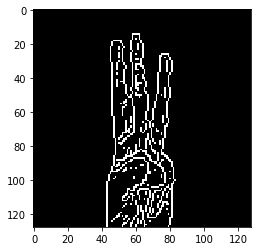

21


In [19]:
index = 8
show_image(X_train[index].reshape((128, 128)))
print(Y_train[index])

In [ ]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=(128, 128, 1))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(24)) 
model.add(Activation('softmax')) 

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

In [ ]:
history = model.fit( 
    X_train, 
    Y_train_categorical,
    epochs=10,
    validation_split=0.2) 

In [ ]:
eval_history = model.evaluate(X_test,
                             Y_test_categorical)

In [14]:
CATEGORIES = list(map(chr, range(ord('A'), ord('Z'))))
CATEGORIES.pop(9)

'J'

In [15]:
def predict(img):
    prediction = model.predict_classes(img.reshape(1, 128, 128, 1))
    print("Prediction:", CATEGORIES[np.squeeze(prediction)])
    show_image(img)

In [ ]:
index = 4
img_edges = X_test[index].reshape(128, 128)
cat = CATEGORIES[Y_test[index]]
prediction = model.predict_classes(X_test[index].reshape(1, 128, 128, 1))

print("Original:", cat)
print("Prediction:", CATEGORIES[np.squeeze(prediction)])
show_image(img_edges)

In [16]:
def mask_skin(frame, visualize_steps= False):
    converted2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
    skinMask = cv2.addWeighted(skinMask,0.5,skinMask,0.5,0.0)
    skinMask = cv2.medianBlur(skinMask, 5)
    
    skin = cv2.bitwise_and(converted2, converted2, mask = skinMask)
    
    if visualize_steps:
        show_image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        show_image(converted)
        show_image(converted2)
        show_image(skinMask)
    
    return skin

In [17]:
def process_image(img_array, visualize_steps= False):
    frame = cv2.resize(img_array, (128, 128))
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    skin = mask_skin(frame, visualize_steps)
    
    edges = cv2.Canny(skin,60,60)
    
    if visualize_steps:
        print("path:", path)
        print("shape:", img_array.shape)
        show_image(skin)
        show_image(edges)
            
    cv2.destroyAllWindows()
    return edges

In [ ]:
p = r'C:\Users\jyoth\OneDrive\Pictures\Camera Roll\five.jpg'
image = cv2.imread(p)
edges = process_image(image)
predict(edges)

In [ ]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 

while(True):
    ret,frame = cap.read() # return a single frame in variable `frame`
    cv2.imshow('img1',frame) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y'
        break

cap.release()
cv2.destroyAllWindows()

edges = process_image(frame)
predict(edges)

In [ ]:
model.save('mod')

In [ ]:
model = tf.keras.models.load_model('mod')

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

In [ ]:
history = model.fit( 
    X_train, 
    Y_train_categorical,
    epochs=10,
    validation_split=0.2) 

In [ ]:
eval_history = model.evaluate(X_test,
                             Y_test_categorical)

In [ ]:
CATEGORIES = list(map(chr, range(ord('A'), ord('Z'))))
CATEGORIES.pop(9)

In [ ]:
def predict(img):
    prediction = model.predict_classes(img.reshape(1, 128, 128, 1))
    print("Prediction:", CATEGORIES[np.squeeze(prediction)])
    show_image(img)

In [ ]:
index = 4
img_edges = X_test[index].reshape(128, 128)
cat = CATEGORIES[Y_test[index]]
prediction = model.predict_classes(X_test[index].reshape(1, 128, 128, 1))

print("Original:", cat)
print("Prediction:", CATEGORIES[np.squeeze(prediction)])
show_image(img_edges)

In [ ]:
def mask_skin(frame, visualize_steps= False):
    converted2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
    skinMask = cv2.addWeighted(skinMask,0.5,skinMask,0.5,0.0)
    skinMask = cv2.medianBlur(skinMask, 5)
    
    skin = cv2.bitwise_and(converted2, converted2, mask = skinMask)
    
    if visualize_steps:
        show_image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        show_image(converted)
        show_image(converted2)
        show_image(skinMask)
    
    return skin

In [ ]:
def process_image(img_array, visualize_steps= False):
    frame = cv2.resize(img_array, (128, 128))
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    skin = mask_skin(frame, visualize_steps)
    
    edges = cv2.Canny(skin,60,60)
    
    if visualize_steps:
        print("path:", path)
        print("shape:", img_array.shape)
        show_image(skin)
        show_image(edges)
            
    cv2.destroyAllWindows()
    return edges

In [ ]:
p = r'C:\Users\jyoth\OneDrive\Pictures\Camera Roll\five.jpg'
image = cv2.imread(p)
edges = process_image(image)
predict(edges)

In [ ]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
while(True):
    ret,frame = cap.read()
    cv2.imshow('img1',frame) #display the captured image
    k = cv2.waitKey(30)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

edges = process_image(frame)
predict(edges)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
model.save('mod')

In [ ]:
model = tf.keras.models.load_model('mod')

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

In [22]:
history = model.fit( 
    X_train, 
    Y_train_categorical,
    epochs=10,
    validation_split=0.2) 

Train on 3182 samples, validate on 796 samples
Epoch 1/10
3182/3182 [==============================] - 20s 6ms/sample - loss: 2.3123 - accuracy: 0.3246 - val_loss: 0.9999 - val_accuracy: 0.7148
Epoch 2/10
3182/3182 [==============================] - 18s 6ms/sample - loss: 1.0545 - accuracy: 0.6666 - val_loss: 0.4041 - val_accuracy: 0.9095
Epoch 3/10
3182/3182 [==============================] - 20s 6ms/sample - loss: 0.6440 - accuracy: 0.7813 - val_loss: 0.1887 - val_accuracy: 0.9510
Epoch 4/10
3182/3182 [==============================] - 18s 6ms/sample - loss: 0.4453 - accuracy: 0.8495 - val_loss: 0.1422 - val_accuracy: 0.9623
Epoch 5/10
3182/3182 [==============================] - 18s 6ms/sample - loss: 0.3662 - accuracy: 0.8768 - val_loss: 0.1046 - val_accuracy: 0.9711
Epoch 6/10
3182/3182 [==============================] - 19s 6ms/sample - loss: 0.3124 - accuracy: 0.8953 - val_loss: 0.0805 - val_accuracy: 0.9799
Epoch 7/10
3182/3182 [==============================] - 19s 6ms/sample 

In [23]:
eval_history = model.evaluate(X_test,
                             Y_test_categorical)

497/497 [==============================] - 1s 1ms/sample - loss: 0.0848 - accuracy: 0.9779


In [3]:
CATEGORIES = list(map(chr, range(ord('A'), ord('Z'))))
CATEGORIES.pop(9)

'J'

In [19]:
def predict(img):
    prediction = model.predict_classes(img.reshape(1, 128, 128, 1))
    print("Prediction:", CATEGORIES[np.squeeze(prediction)])
    show_image(img)

In [11]:
index = 4
img_edges = X_test[index].reshape(128, 128)
cat = CATEGORIES[Y_test[index]]
prediction = model.predict_classes(X_test[index].reshape(1, 128, 128, 1))

print("Original:", cat)
print("Prediction:", CATEGORIES[np.squeeze(prediction)])
show_image(img_edges)

NameError: name 'X_test' is not defined

In [20]:
def mask_skin(frame, visualize_steps= False):
    converted2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
    skinMask = cv2.addWeighted(skinMask,0.5,skinMask,0.5,0.0)
    skinMask = cv2.medianBlur(skinMask, 5)
    
    skin = cv2.bitwise_and(converted2, converted2, mask = skinMask)
    
    if visualize_steps:
        show_image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        show_image(converted)
        show_image(converted2)
        show_image(skinMask)
    
    return skin

In [21]:
def process_image(img_array, visualize_steps= False):
    frame = cv2.resize(img_array, (128, 128))
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    skin = mask_skin(frame, visualize_steps)
    
    edges = cv2.Canny(skin,60,60)
    
    if visualize_steps:
        print("path:", path)
        print("shape:", img_array.shape)
        show_image(skin)
        show_image(edges)
            
    cv2.destroyAllWindows()
    return edges

Prediction: E


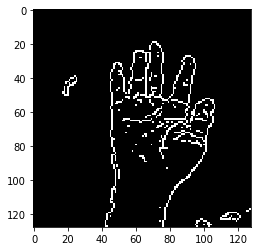

In [22]:
p = r'C:\Users\jyoth\OneDrive\Pictures\Camera Roll\five.jpg'
image = cv2.imread(p)
edges = process_image(image)
predict(edges)

Prediction: Y


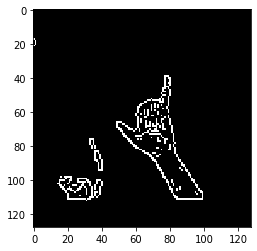

In [35]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
while(True):
    ret,frame = cap.read()
    cv2.imshow('img1',frame) #display the captured image
    k = cv2.waitKey(30)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

edges = process_image(frame)
predict(edges)

In [25]:
cv2.destroyAllWindows()

In [31]:
model.save('mod')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mod\assets


In [18]:
model = tf.keras.models.load_model('mod')